# [**x.x] Predicting Free-Fall Time Using Supervised Polynomial Regression**

**Prepared by:**
- Joaquin A. Castañeda

**Weekly Objectives:**
- Construct a dataset with experimental and simulated free-fall data.
- Model fall time using polynomial regression.
- Evaluate model performance using MSE and R².
- Visualize predictions against actual measurements.

**References:**
- [Pandas (DataFame)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
- [Numpy (Array Creation Routines - Linspace)](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
- [Numpy (Array Creation Routines - Concatenate)](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html)
- [Numpy (Random Sampling - Random Normal)](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)
- [Numpy (Mathematical Functions)](https://numpy.org/doc/stable/reference/routines.math.html)
- [Scikit-learn (Preprocessing - Polynomial Features)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- [Scikit-learn (Linear Model - Linear Regression)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Scikit-learn (Metrics - MSE)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
- [Matplotlib (Pyplot)](https://matplotlib.org/stable/api/pyplot_summary.html)



**Introduction**

Fall time depends on height, and the relationship is curved since the underlying equation involves a quadratic term.

Polynomial regression helps us model this by adding powers of the height (like height²) so the line can follow the curve, while still being linear in coefficients.

Supervised learning uses known data (input: height; output: time) to train the model to predict new values. The model’s performance is evaluated using MSE (mean squared error) and R², which indicate how accurately it predicts.


**Methodology**

1. Collect experimental data (height, time).


2. Create simulated data, add noise.


3. Merge experimental and simulated data into one dataset.


4. Split data into training and testing sets.


5. Transform heights into polynomial features.


6. Train linear regression model on training data.


7. Predict fall times for the test set.


8. Evaluate performance using MSE and R².


9. Visualize predictions vs actual values.


**Expectations**

- See how polynomial regression models curved data from free-fall experiment.
- Do supervised learning; train model with inputs and outputs
- Do model evaluation metrics and see their significance.

# I. Create the Experimental Data Table

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

Install the necessary packages:

- pandas: For handling tabular data with DataFrames

- numpy: For numerical operations and arrays

- matplotlib.pyplot: For plotting graphs and visualizations

- sklearn.linear_model.LinearRegression: Linear regression model

- sklearn.model_selection.train_test_split: Splitting data into training/testing sets

- sklearn.metrics.mean_squared_error, r2_score: Metrics to evaluate model performance

- sklearn.preprocessing.PolynomialFeatures: Generate polynomial features for regression

In [49]:
data = {
    'Height_m': [0.2, 0.4, 0.6, 0.8, 1.0],
    'Trial1_s': [0.23, 0.29, 0.34, 0.45, 0.51],
    'Trial2_s': [0.23, 0.27, 0.39, 0.41, 0.47],
    'Trial3_s': [0.21, 0.28, 0.35, 0.43, 0.48],
    'Trial4_s': [0.18, 0.31, 0.33, 0.41, 0.47],
    'Trial5_s': [0.17, 0.31, 0.37, 0.43, 0.50],
    'Trial6_s': [0.22, 0.31, 0.39, 0.44, 0.50],
}

This defines the experimental data: heights (`Height_m`) and fall times (`Trial1_s`–`Trial6_s`). Stored as a dictionary for easy conversion to a DataFrame.

In [50]:
df = pd.DataFrame(data)

Converts the data dictionary into a pandas DataFrame, making it easier to manipulate, analyze, and visualize.

In [51]:
df['Average_s'] = df[['Trial1_s', 'Trial2_s', 'Trial3_s', 'Trial4_s', 'Trial5_s', 'Trial6_s']].mean(axis=1)

df

,Height_m,Trial1_s,Trial2_s,Trial3_s,Trial4_s,Trial5_s,Trial6_s,Average_s
0,0.2,0.23,0.23,0.21,0.18,0.17,0.22,0.206667
1,0.4,0.29,0.27,0.28,0.31,0.31,0.31,0.295000
2,0.6,0.34,0.39,0.35,0.33,0.37,0.39,0.361667
3,0.8,0.45,0.41,0.43,0.41,0.43,0.44,0.428333
4,1.0,0.51,0.47,0.48,0.47,0.50,0.50,0.488333


Creates a new column Average_s that contains the average of all trial times for each row (height).

`axis=1` → compute mean across the trials for each height.

The final `df` displays the updated DataFrame.

# II. Simulate Additional Data

In [52]:
g = 9.81

np.random.seed(42)

sim_heights = np.linspace(0.1, 1, 100)
sim_times = np.sqrt(2*sim_heights/g) + np.random.normal(0, 0.02, sim_heights.shape)


Generate simulated data for free-fall: create 100 heights evenly spaced from 0.1 m to 1 m (`sim_heights`). Compute the corresponding fall times using sqrt(2 * height / g) and add random noise to simulate measurement errors (`sim_times`).

# III. Combine Experimental and Simulated Data

In [53]:
combined_heights = np.concatenate([df['Height_m'].values, sim_heights])
combined_times = np.concatenate([df['Average_s'].values, sim_times])


Combine experimental and simulated data: merge the measured heights (`df['Height_m']`) with simulated heights (`sim_heights`) into combined_heights, and merge the corresponding times (`df['Average_s'] and sim_times`) into combined_times. This creates a single dataset for training and testing.

In [54]:
ml_df = pd.DataFrame({'Height_m': combined_heights,'Time_s': combined_times})

ml_df

,Height_m,Time_s
0,0.200000,0.206667
1,0.400000,0.295000
2,0.600000,0.361667
3,0.800000,0.428333
4,1.000000,0.488333
...,...,...
100,0.963636,0.413968
101,0.972727,0.451246
102,0.981818,0.452621
103,0.990909,0.449569


Create a new DataFrame `ml_df` containing the combined dataset. It has two columns: `Height_m` for heights and `Time_s` for corresponding fall times. This is the main dataset for the polynomial regression model.

# IV. Train the Polynomial Regression Model

In [55]:
X = ml_df[['Height_m']]
y = ml_df['Time_s']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We define X as the independent variable (height) and y as the dependent variable (time).

`train_test_split` divides the data into training and testing sets.

`test_size=0.2` means 20% of the data is reserved for testing, and 80% for training.

`random_state=42` ensures the split is reproducible.

In [56]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

We create a `PolynomialFeatures` object named `poly` with degree 2 to generate quadratic features from the height.  

`fit_transform` on the training data learns the transformation (how to generate powers of `X`) and applies it, producing features like \(1, X, X^2\).  

`transform` on the test data applies the same transformation without refitting, ensuring consistency with the training set.  

Only the independent variable `X` is transformed; `y` remains as the target we want to predict.


In [57]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

We create a `LinearRegression` object named `model` to perform the regression.

Using `model.fit`, the model learns the relationship between the transformed features (`X_train_poly`) and the target `y_train`.

The model determines the slope and intercept (coefficients) that best fit the training data.


In [58]:
y_pred_poly = model.predict(X_test_poly)

We use `model.predict` on the transformed test features (`X_test_poly`) to generate predicted fall times.

This gives `y_pred_poly`, which contains the model's estimates corresponding to the test set.


In [59]:
mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print(f"MSE = {mse:.4f}")
print(f"R² = {r2:.4f}")

MSE = 0.0003
R² = 0.9730


We calculate `mean_squared_error` and `r2_score` to evaluate the model’s performance.

MSE computes the average squared difference between actual (`y_test`) and predicted (`y_pred_poly`) values.

R² measures how well the predictions follow the trend of the real data:
1 means perfect trend capture, 0 means predicting just the mean, negative means worse than predicting the mean.

This completes the workflow: training with `.fit()`, predicting with `.predict()`, and evaluating with MSE and R².


# V. Evaluate and Visualize Model Performance

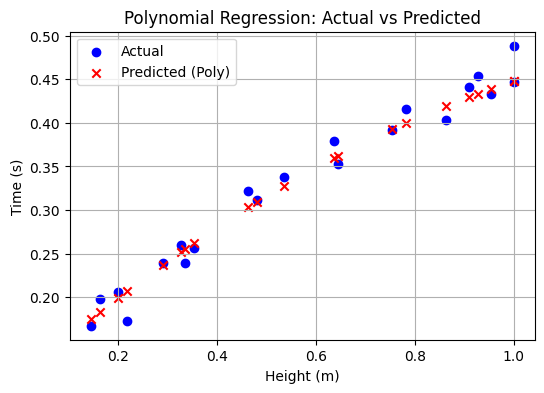

In [60]:
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_poly, color='red', marker='x', label='Predicted (Poly)')
plt.xlabel('Height (m)')
plt.ylabel('Time (s)')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.grid(True)
plt.legend()
plt.show()


We create a figure with `plt.figure(figsize=(6,4))` to set the canvas size.

`plt.scatter` plots the actual and predicted values, using different colors and markers for distinction.

`plt.xlabel` and `plt.ylabel` label the axes, while `plt.title` adds a plot title.

`plt.grid(True)` displays grid lines for easier reading.

`plt.legend()` shows labels for each dataset, and `plt.show()` renders the plot.


The scatter plot shown above illustrates how our ML model predicts time, given height data sets. The blue dots represent actual experimental and simulated data, whereas, the red crosses show the predicted values using polynomial regression. The MSE of 0.0003 and the R² of 0.9703 show that the model’s predictions closely match the actual data. Overall, the predictions are both accurate and precise, following the curved trend of the actual data.


**End of tutorial.**